In [70]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [71]:
# DATA_PATH = "./logs/Atari"
# DATA_PATH = "./logs/Atari_ST"
# DATA_PATH = "./logs/Atari_TS" 
# DATA_PATH = "./logs/Atari_TS2" # X
# DATA_PATH = "./logs/Atari_VS"
# DATA_PATH = "./logs/Atari_VS2" # X
# DATA_PATH = "./logs/Atari_MS" # X
# DATA_PATH = "./logs/Atari_MS2"

# DATA_PATH = "./logs/Atari_R"
# DATA_PATH = "./logs/Atari_R_ST"
# DATA_PATH = "./logs/Atari_R_TS" # X
# DATA_PATH = "./logs/Atari_R_TS2"
# DATA_PATH = "./logs/Atari_R_VS"
# DATA_PATH = "./logs/Atari_R_VS2" # X
# DATA_PATH = "./logs/Atari_R_MS"
# DATA_PATH = "./logs/Atari_R_MS2" # X
# DATA_PATH = "./logs/Atari_R_TS_MD"
# DATA_PATH = "./logs/Atari_R_VS_MD"
# DATA_PATH = "./logs/Atari_R_MS_MD"

# DATA_PATH = "./logs/Atari_N"
# DATA_PATH = "./logs/Atari_N_ST"
# DATA_PATH = "./logs/Atari_N_TS"
# DATA_PATH = "./logs/Atari_N_TS2" # X
# DATA_PATH = "./logs/Atari_N_VS" # X
# DATA_PATH = "./logs/Atari_N_VS2"
# DATA_PATH = "./logs/Atari_N_MS"
# DATA_PATH = "./logs/Atari_N_MS2" # X
# DATA_PATH = "./logs/Atari_N_TS_MD"
# DATA_PATH = "./logs/Atari_N_VS_MD"
# DATA_PATH = "./logs/Atari_N_MS_MD"

In [72]:
DATASET = "Atari"
MODEL_NAME = "NatureDQNNetwork"
NUM_EXPERIENCES = 5
valid_colors = ['green', 'red', 'cyan', 'magenta', 'black', 'purple', 'orange', 'brown', 'gray', 'olive', 'indigo', 'turquoise']*10

In [73]:
# all combinations of training
run2name = {    
    # "j_nst_npp" : "JointTraining_NoSelfTraining_NoPostProcessing",
    # # "j_st_npp_1" : "JointTraining_SelfTraining_1.0_NoPostProcessing",
    # "j_st_npp_01" : "JointTraining_SelfTraining_0.1_NoPostProcessing",
    # # "j_st_npp_0075" : "JointTraining_SelfTraining_0.075_NoPostProcessing",
    # "j_st_npp_005" : "JointTraining_SelfTraining_0.05_NoPostProcessing",
    # # "j_st_npp_0025" : "JointTraining_SelfTraining_0.025_NoPostProcessing",
    # # "j_st_npp_001" : "JointTraining_SelfTraining_0.01_NoPostProcessing",
    # "j_st_npp_00075" : "JointTraining_SelfTraining_0.0075_NoPostProcessing",
    # # "j_st_npp_0005" : "JointTraining_SelfTraining_0.005_NoPostProcessing",
    # # "j_st_npp_00025" : "JointTraining_SelfTraining_0.0025_NoPostProcessing",
    # # "j_st_npp" : "JointTraining_SelfTraining_0.001_NoPostProcessing", # 0.001
    # # "j_nst_pp" : "JointTraining_NoSelfTraining_PostProcessing",

    "j_nst_npp_v1" : ("JointTraining_NoSelfTraining_NoPostProcessing1", "./logs/Atari"),
    "j_nst_npp_v2" : ("JointTraining_NoSelfTraining_NoPostProcessing2", "./logs/Atari"),
    "j_nst_npp_v3" : ("JointTraining_NoSelfTraining_NoPostProcessing3", "./logs/Atari"),
    "j_st_npp_00075_v1" : ("JointTraining_SelfTraining_0.0075_NoPostProcessing1", "./logs/Atari_ST"),
    "j_st_npp_00075_v2" : ("JointTraining_SelfTraining_0.0075_NoPostProcessing2", "./logs/Atari_ST"),
    "j_st_npp_00075_v3" : ("JointTraining_SelfTraining_0.0075_NoPostProcessing3", "./logs/Atari_ST"),
    "j_pp_ts_v0" : ("JointTraining_NoSelfTraining_PostProcessing_TemperatureScaling1", "./logs/Atari_TS2"),
    "j_pp_ts_v1" : ("JointTraining_NoSelfTraining_PostProcessing_TemperatureScaling2", "./logs/Atari_TS2"),
    "j_pp_ts_v2" : ("JointTraining_NoSelfTraining_PostProcessing_TemperatureScaling3", "./logs/Atari_TS2"),
    "j_pp_vs_v1" : ("JointTraining_NoSelfTraining_PostProcessing_VectorScaling1", "./logs/Atari_VS2"),
    "j_pp_vs_v2" : ("JointTraining_NoSelfTraining_PostProcessing_VectorScaling2", "./logs/Atari_VS2"),
    "j_pp_vs_v3" : ("JointTraining_NoSelfTraining_PostProcessing_VectorScaling3", "./logs/Atari_VS2"),
    "j_pp_ms_v1" : ("JointTraining_NoSelfTraining_PostProcessing_MatrixScaling1", "./logs/Atari_MS"),
    "j_pp_ms_v2" : ("JointTraining_NoSelfTraining_PostProcessing_MatrixScaling2", "./logs/Atari_MS"),
    "j_pp_ms_v3" : ("JointTraining_NoSelfTraining_PostProcessing_MatrixScaling3", "./logs/Atari_MS"),

    "r_nst_npp_v1" : ("Replay_NoSelfTraining_NoPostProcessing1", "./logs/Atari_R"),
    "r_nst_npp_v2" : ("Replay_NoSelfTraining_NoPostProcessing2", "./logs/Atari_R"),
    "r_nst_npp_v3" : ("Replay_NoSelfTraining_NoPostProcessing3", "./logs/Atari_R"),
    "r_st_npp_00025_v1" : ("Replay_SelfTraining_0.0025_NoPostProcessing4", "./logs/Atari_R_ST"),
    "r_st_npp_00025_v2" : ("Replay_SelfTraining_0.0025_NoPostProcessing2", "./logs/Atari_R_ST"),
    "r_st_npp_00025_v3" : ("Replay_SelfTraining_0.0025_NoPostProcessing3", "./logs/Atari_R_ST"),
    "r_pp_ts_v0" : ("Replay_NoSelfTraining_PostProcessing_TemperatureScaling1", "./logs/Atari_R_TS"),
    "r_pp_ts_v1" : ("Replay_NoSelfTraining_PostProcessing_TemperatureScaling2", "./logs/Atari_R_TS"),
    "r_pp_ts_v2" : ("Replay_NoSelfTraining_PostProcessing_TemperatureScaling3", "./logs/Atari_R_TS"),
    "r_pp_vs_v1" : ("Replay_NoSelfTraining_PostProcessing_VectorScaling1", "./logs/Atari_R_VS2"),
    "r_pp_vs_v2" : ("Replay_NoSelfTraining_PostProcessing_VectorScaling2", "./logs/Atari_R_VS2"),
    "r_pp_vs_v3" : ("Replay_NoSelfTraining_PostProcessing_VectorScaling3", "./logs/Atari_R_VS2"),
    "r_pp_ms_v1" : ("Replay_NoSelfTraining_PostProcessing_MatrixScaling1", "./logs/Atari_R_MS2"),
    "r_pp_ms_v2" : ("Replay_NoSelfTraining_PostProcessing_MatrixScaling2", "./logs/Atari_R_MS2"),
    "r_pp_ms_v3" : ("Replay_NoSelfTraining_PostProcessing_MatrixScaling3", "./logs/Atari_R_MS2"),
    "r_pp_ts_md_v0" : ("Replay_NoSelfTraining_PostProcessing_TemperatureScaling_MixedData1", "./logs/Atari_R_TS_MD"),
    "r_pp_ts_md_v1" : ("Replay_NoSelfTraining_PostProcessing_TemperatureScaling_MixedData2", "./logs/Atari_R_TS_MD"),
    "r_pp_ts_md_v2" : ("Replay_NoSelfTraining_PostProcessing_TemperatureScaling_MixedData3", "./logs/Atari_R_TS_MD"),
    "r_pp_vs_md_v1" : ("Replay_NoSelfTraining_PostProcessing_VectorScaling_MixedData1", "./logs/Atari_R_VS_MD"),
    "r_pp_vs_md_v2" : ("Replay_NoSelfTraining_PostProcessing_VectorScaling_MixedData2", "./logs/Atari_R_VS_MD"),
    "r_pp_vs_md_v3" : ("Replay_NoSelfTraining_PostProcessing_VectorScaling_MixedData3", "./logs/Atari_R_VS_MD"),
    "r_pp_ms_md_v1" : ("Replay_NoSelfTraining_PostProcessing_MatrixScaling_MixedData1", "./logs/Atari_R_MS_MD"),
    "r_pp_ms_md_v2" : ("Replay_NoSelfTraining_PostProcessing_MatrixScaling_MixedData2", "./logs/Atari_R_MS_MD"),
    "r_pp_ms_md_v3" : ("Replay_NoSelfTraining_PostProcessing_MatrixScaling_MixedData3", "./logs/Atari_R_MS_MD"),

    "n_nst_npp_v1" : ("Naive_NoSelfTraining_NoPostProcessing1", "./logs/Atari_N"),
    "n_nst_npp_v2" : ("Naive_NoSelfTraining_NoPostProcessing2", "./logs/Atari_N"),
    "n_nst_npp_v3" : ("Naive_NoSelfTraining_NoPostProcessing3", "./logs/Atari_N"), 
    "n_st_npp_001_v1" : ("Naive_SelfTraining_0.01_NoPostProcessing1", "./logs/Atari_N_ST"), 
    "n_st_npp_001_v2" : ("Naive_SelfTraining_0.01_NoPostProcessing2", "./logs/Atari_N_ST"), 
    "n_st_npp_001_v3" : ("Naive_SelfTraining_0.01_NoPostProcessing3", "./logs/Atari_N_ST"), 
    "n_st_npp_0005_v1" : ("Naive_SelfTraining_0.005_NoPostProcessing1", "./logs/Atari_N_ST"), 
    "n_st_npp_0005_v2" : ("Naive_SelfTraining_0.005_NoPostProcessing2", "./logs/Atari_N_ST"), 
    "n_st_npp_0005_v3" : ("Naive_SelfTraining_0.005_NoPostProcessing3", "./logs/Atari_N_ST"), 
    "n_pp_ts_v0" : ("Naive_NoSelfTraining_PostProcessing_TemperatureScaling1", "./logs/Atari_N_TS2"), 
    "n_pp_ts_v1" : ("Naive_NoSelfTraining_PostProcessing_TemperatureScaling2", "./logs/Atari_N_TS2"), 
    "n_pp_ts_v2" : ("Naive_NoSelfTraining_PostProcessing_TemperatureScaling3", "./logs/Atari_N_TS2"), 
    "n_pp_vs_v1" : ("Naive_NoSelfTraining_PostProcessing_VectorScaling1", "./logs/Atari_N_VS2"), 
    "n_pp_vs_v2" : ("Naive_NoSelfTraining_PostProcessing_VectorScaling2", "./logs/Atari_N_VS2"), 
    "n_pp_vs_v3" : ("Naive_NoSelfTraining_PostProcessing_VectorScaling3", "./logs/Atari_N_VS2"), 
    "n_pp_ms_v1" : ("Naive_NoSelfTraining_PostProcessing_MatrixScaling1", "./logs/Atari_N_MS2"), 
    "n_pp_ms_v2" : ("Naive_NoSelfTraining_PostProcessing_MatrixScaling2", "./logs/Atari_N_MS2"), 
    "n_pp_ms_v3" : ("Naive_NoSelfTraining_PostProcessing_MatrixScaling3", "./logs/Atari_N_MS2"), 
    "n_pp_ts_md_v0" : ("Naive_NoSelfTraining_PostProcessing_TemperatureScaling_MixedData1", "./logs/Atari_N_TS_MD"), 
    "n_pp_ts_md_v1" : ("Naive_NoSelfTraining_PostProcessing_TemperatureScaling_MixedData2", "./logs/Atari_N_TS_MD"), 
    "n_pp_ts_md_v2" : ("Naive_NoSelfTraining_PostProcessing_TemperatureScaling_MixedData3", "./logs/Atari_N_TS_MD"), 
    "n_pp_vs_md_v1" : ("Naive_NoSelfTraining_PostProcessing_VectorScaling_MixedData1", "./logs/Atari_N_VS_MD"),
    "n_pp_vs_md_v2" : ("Naive_NoSelfTraining_PostProcessing_VectorScaling_MixedData2", "./logs/Atari_N_VS_MD"),
    "n_pp_vs_md_v3" : ("Naive_NoSelfTraining_PostProcessing_VectorScaling_MixedData3", "./logs/Atari_N_VS_MD"),
    "n_pp_ms_md_v1" : ("Naive_NoSelfTraining_PostProcessing_MatrixScaling_MixedData1", "./logs/Atari_N_MS_MD"),
    "n_pp_ms_md_v2" : ("Naive_NoSelfTraining_PostProcessing_MatrixScaling_MixedData2", "./logs/Atari_N_MS_MD"),
    "n_pp_ms_md_v3" : ("Naive_NoSelfTraining_PostProcessing_MatrixScaling_MixedData3", "./logs/Atari_N_MS_MD"),
}

In [74]:
run2label = {    
    "j_nst_npp" : "JointTraining",
    "j_st_npp_1" : "JointTraining_ST_1",
    "j_st_npp_01" : "JointTraining_ST_0.1",
    "j_st_npp_001" : "JointTraining_ST_0.01",
    "j_st_npp_005" : "JointTraining_ST_0.05",
    "j_st_npp_0025" : "JointTraining_ST_0.025",
    "j_st_npp_0075" : "JointTraining_ST_0.075",
    "j_st_npp_0005" : "JointTraining_ST_0.005",
    "j_st_npp_00025" : "JointTraining_ST_0.0025",
    "j_st_npp_00075" : "JointTraining_ST_0.0075",
    "j_st_npp" : "JointTraining_ST_0.001",
    "j_nst_pp" : "JointTraining_PostProcessing",

    "j_nst_npp_v1" : "JointTraining",
    "j_nst_npp_v2" : "JointTraining",
    "j_nst_npp_v3" : "JointTraining",
    "j_st_npp_00075_v1" : "JointTraining_ST_0.0075",
    "j_st_npp_00075_v2" : "JointTraining_ST_0.0075",
    "j_st_npp_00075_v3" : "JointTraining_ST_0.0075",
    "j_pp_vs_v1" : "JointTraining_VS",
    "j_pp_vs_v2" : "JointTraining_VS",
    "j_pp_vs_v3" : "JointTraining_VS",
    "j_pp_ms_v1" : "JointTraining_MS",
    "j_pp_ms_v2" : "JointTraining_MS",
    "j_pp_ms_v3" : "JointTraining_MS",
    "j_pp_ts_v0" : "JointTraining_TS",
    "j_pp_ts_v1" : "JointTraining_TS",
    "j_pp_ts_v2" : "JointTraining_TS",

    "r_nst_npp_v1" : "Replay",
    "r_nst_npp_v2" : "Replay",
    "r_nst_npp_v3" : "Replay",
    "r_st_npp_00025_v1" : "Replay_ST_0.0025",
    "r_st_npp_00025_v2" : "Replay_ST_0.0025",
    "r_st_npp_00025_v3" : "Replay_ST_0.0025",
    "r_pp_vs_v1" : "Replay_VS",
    "r_pp_vs_v2" : "Replay_VS",
    "r_pp_vs_v3" : "Replay_VS",
    "r_pp_ms_v1" : "Replay_MS",
    "r_pp_ms_v2" : "Replay_MS",
    "r_pp_ms_v3" : "Replay_MS",
    "r_pp_ts_v0" : "Replay_TS",
    "r_pp_ts_v1" : "Replay_TS",
    "r_pp_ts_v2" : "Replay_TS",
    "r_pp_vs_md_v1" : "Replay_VS_MD",
    "r_pp_vs_md_v2" : "Replay_VS_MD",
    "r_pp_vs_md_v3" : "Replay_VS_MD",
    "r_pp_ms_md_v1" : "Replay_MS_MD",
    "r_pp_ms_md_v2" : "Replay_MS_MD",
    "r_pp_ms_md_v3" : "Replay_MS_MD",
    "r_pp_ts_md_v0" : "Replay_TS_MD",
    "r_pp_ts_md_v1" : "Replay_TS_MD",
    "r_pp_ts_md_v2" : "Replay_TS_MD",
    
    "n_nst_npp_v1" : "Naive",
    "n_nst_npp_v2" : "Naive",
    "n_nst_npp_v3" : "Naive",
    "n_st_npp_001_v1" : "Naive_ST_0.01",
    "n_st_npp_001_v2" : "Naive_ST_0.01",
    "n_st_npp_001_v3" : "Naive_ST_0.01",
    "n_st_npp_0005_v1" : "Naive_ST_0.005",
    "n_st_npp_0005_v2" : "Naive_ST_0.005",
    "n_st_npp_0005_v3" : "Naive_ST_0.005",
    "n_pp_vs_v1" : "Naive_VS",
    "n_pp_vs_v2" : "Naive_VS",
    "n_pp_vs_v3" : "Naive_VS",
    "n_pp_ms_v1" : "Naive_MS",
    "n_pp_ms_v2" : "Naive_MS",
    "n_pp_ms_v3" : "Naive_MS",
    "n_pp_ts_v0" : "Naive_TS",
    "n_pp_ts_v1" : "Naive_TS",
    "n_pp_ts_v2" : "Naive_TS",
    "n_pp_vs_md_v1" : "Naive_VS_MD",
    "n_pp_vs_md_v2" : "Naive_VS_MD",
    "n_pp_vs_md_v3" : "Naive_VS_MD",
    "n_pp_ms_md_v1" : "Naive_MS_MD",
    "n_pp_ms_md_v2" : "Naive_MS_MD",
    "n_pp_ms_md_v3" : "Naive_MS_MD",
    "n_pp_ts_md_v0" : "Naive_TS_MD",
    "n_pp_ts_md_v1" : "Naive_TS_MD",
    "n_pp_ts_md_v2" : "Naive_TS_MD",
}

In [75]:
running_accuracy = []
running_ece = []
final_accuracy = []
final_ece = []
bins = None
ece_hist_vals = []

for k, (name, path) in run2name.items():
    print(f">> {name} <<")
    with open(f"{path}/{DATASET}_{MODEL_NAME}_{name}_dict", "rb") as file:
        data = pickle.load(file)

        # print("\n---- ACCURACY ----")

        metric_str = "Top1_Acc_Exp/eval_phase/test_stream/Task000/Exp"
        m = []
        for i in range(len(data)):
            cur_exp_dict = data[i]
            cur_exp_acc = 0
            # compute the average over the experiences trained so far (i)
            for j in range(i+1):
                # print(i, j, metric_str + f"{j:03d}", cur_exp_dict[metric_str + f"{j:03d}"])
                cur_exp_acc += cur_exp_dict[metric_str + f"{j:03d}"]
            m.append(cur_exp_acc/(i+1))
        
        # duplicate for JointTraining
        if len(m) < NUM_EXPERIENCES:
            m = m*NUM_EXPERIENCES
        running_accuracy.append((k, m))
        final_accuracy.append((k, running_accuracy[-1][-1][-1]))
        # print(k, m, running_accuracy[-1][-1][-1])

        # print("\n---- ECE ----")

        metric_str = "ECE_Exp/eval_phase/test_stream/Task000/Exp"
        m = []
        for i in range(len(data)):
            cur_exp_dict = data[i]
            cur_exp_ece = 0
            # compute the average over the experiences trained so far (i)
            for j in range(i+1):
                # print(i, j, metric_str + f"{j:03d}", cur_exp_dict[metric_str + f"{j:03d}"])
                cur_exp_ece += cur_exp_dict[metric_str + f"{j:03d}"]
            # m.append(cur_exp_ece/(i+1))
            m.append((cur_exp_ece/(i+1))*100)
        
        # duplicate for JointTraining
        if len(m) < NUM_EXPERIENCES:
            m = m*NUM_EXPERIENCES
        running_ece.append((k, m))
        final_ece.append((k, running_ece[-1][-1][-1]))
        # print(k, m, running_ece[-1][-1][-1])

        # print("\n---- ECE HISTOGRAMS ----")

        metric_str = "ExpECEHistogram/eval_phase/test_stream/Exp"
        m = []
        i = -1 # after last experience
        cur_exp_dict = data[i]
        for j in range(NUM_EXPERIENCES):
            # print(i, j, metric_str + f"{j:03d}", cur_exp_dict[metric_str + f"{j:03d}"])
            fig = cur_exp_dict[metric_str + f"{j:03d}"]
            axes_list = fig.get_axes()
            for ax in axes_list:
                for line in ax.get_lines()[-1:]:
                    x_data = line.get_xdata()
                    y_data = line.get_ydata()
                    # print({'x': x_data, 'y': y_data})
                    if bins is None:
                        bins = x_data
                    m.append(y_data)
        # print(bins, m)
        bin_vals = []
        for i in range(len(bins)):
            x = []
            for j in range(len(m)):
                # print(j, i, m[j][i])
                x.append(m[j][i])
            mean = np.mean(x)
            std = np.std(x)
            bin_vals.append((mean, std))
        # print(k, bin_vals)
        ece_hist_vals.append((k, bin_vals))


>> JointTraining_NoSelfTraining_NoPostProcessing1 <<
>> JointTraining_NoSelfTraining_NoPostProcessing2 <<
>> JointTraining_NoSelfTraining_NoPostProcessing3 <<
>> JointTraining_SelfTraining_0.0075_NoPostProcessing1 <<
>> JointTraining_SelfTraining_0.0075_NoPostProcessing2 <<
>> JointTraining_SelfTraining_0.0075_NoPostProcessing3 <<
>> JointTraining_NoSelfTraining_PostProcessing_TemperatureScaling1 <<
>> JointTraining_NoSelfTraining_PostProcessing_TemperatureScaling2 <<
>> JointTraining_NoSelfTraining_PostProcessing_TemperatureScaling3 <<
>> JointTraining_NoSelfTraining_PostProcessing_VectorScaling1 <<
>> JointTraining_NoSelfTraining_PostProcessing_VectorScaling2 <<
>> JointTraining_NoSelfTraining_PostProcessing_VectorScaling3 <<
>> JointTraining_NoSelfTraining_PostProcessing_MatrixScaling1 <<
>> JointTraining_NoSelfTraining_PostProcessing_MatrixScaling2 <<
>> JointTraining_NoSelfTraining_PostProcessing_MatrixScaling3 <<
>> Replay_NoSelfTraining_NoPostProcessing1 <<
>> Replay_NoSelfTrain

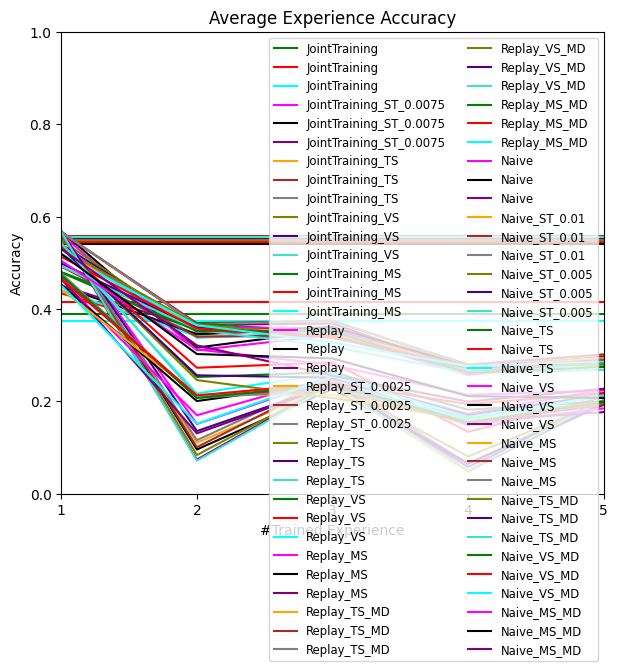

In [76]:
# PLOT 1: Average accuracy on all experiences after training on exp j

plt.figure(figsize=(7, 6))
x_axis = list(range(1, NUM_EXPERIENCES+1))
for i, (name, vals) in enumerate(running_accuracy):
    plt.plot(x_axis, vals, label=run2label[name], color=valid_colors[i])
plt.title('Average Experience Accuracy')
plt.xlabel('#Trained Experience')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.xlim(1, NUM_EXPERIENCES)
plt.xticks(x_axis, x_axis)
plt.legend(loc='upper right', fontsize='small', ncol=2)
plt.savefig(f'./imgs/{DATASET}_{NUM_EXPERIENCES}_{str.lower("Average_Experience_Accuracy")}.png', dpi=400)
plt.show()

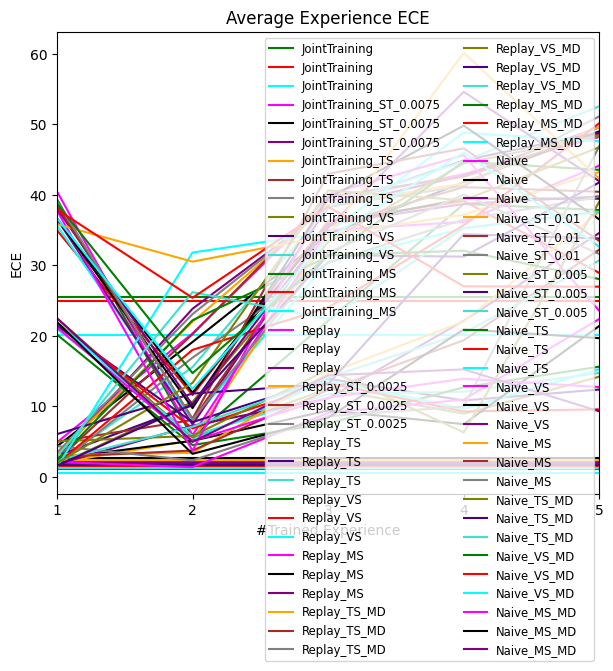

In [77]:
# PLOT 2: Average ece on all experiences after training on exp j

plt.figure(figsize=(7, 6))
x_axis = list(range(1, NUM_EXPERIENCES+1))
for i, (name, vals) in enumerate(running_ece):
    plt.plot(x_axis, vals, label=run2label[name], color=valid_colors[i])
plt.title('Average Experience ECE')
plt.xlabel('#Trained Experience')
plt.ylabel('ECE')
# plt.ylim(0, 1)
plt.xlim(1, NUM_EXPERIENCES)
plt.xticks(x_axis, x_axis)
plt.legend(loc='upper right', fontsize='small', ncol=2)
plt.savefig(f'./imgs/{DATASET}_{NUM_EXPERIENCES}_{str.lower("Average_Experience_ECE")}.png', dpi=400)
plt.show()

In [78]:
# TABLE : average accuracy/ece on all experiences at the end of training

table_data = []
for (n, acc), (_, ece) in zip(final_accuracy, final_ece):
    table_data.append((run2label[n], round(acc*100, 2), round(ece, 4)))

dt = pd.DataFrame(table_data, columns=["RunName", "Accuracy", "ECE"])
print(dt)

                    RunName  Accuracy      ECE
0             JointTraining     55.31   2.2064
1             JointTraining     54.42   1.3305
2             JointTraining     55.59   0.5284
3   JointTraining_ST_0.0075     55.15   1.0778
4   JointTraining_ST_0.0075     54.01   2.6725
..                      ...       ...      ...
61              Naive_VS_MD     21.83  26.9615
62              Naive_VS_MD     20.99  32.6202
63              Naive_MS_MD     22.38  12.7104
64              Naive_MS_MD     20.75  19.6501
65              Naive_MS_MD     22.75   9.2603

[66 rows x 3 columns]


In [79]:
# Calculate mean and standard deviation for each run
mean_accuracy_per_run = dt.groupby('RunName')['Accuracy'].mean()
std_accuracy_per_run = dt.groupby('RunName')['Accuracy'].std()

mean_ece_per_run = dt.groupby('RunName')['ECE'].mean()
std_ece_per_run = dt.groupby('RunName')['ECE'].std()

# Print the results
print("Mean Accuracy per Run:\n", mean_accuracy_per_run)
print("\nStandard Deviation of Accuracy per Run:\n", std_accuracy_per_run)

print("\nMean ECE per Run:\n", mean_ece_per_run)
print("\nStandard Deviation of ECE per Run:\n", std_ece_per_run)

Mean Accuracy per Run:
 RunName
JointTraining              55.106667
JointTraining_MS           39.273333
JointTraining_ST_0.0075    54.826667
JointTraining_TS           55.383333
JointTraining_VS           55.320000
Naive                      20.573333
Naive_MS                   19.490000
Naive_MS_MD                21.960000
Naive_ST_0.005             19.956667
Naive_ST_0.01              20.130000
Naive_TS                   20.963333
Naive_TS_MD                21.406667
Naive_VS                   18.683333
Naive_VS_MD                20.876667
Replay                     29.300000
Replay_MS                  28.983333
Replay_MS_MD               28.340000
Replay_ST_0.0025           29.876667
Replay_TS                  28.290000
Replay_TS_MD               29.036667
Replay_VS                  28.456667
Replay_VS_MD               27.830000
Name: Accuracy, dtype: float64

Standard Deviation of Accuracy per Run:
 RunName
JointTraining              0.610928
JointTraining_MS           2.048080
J

In [80]:
print(dt.to_latex(index=False, float_format="{:.2f}".format))

\begin{tabular}{lrr}
\toprule
RunName & Accuracy & ECE \\
\midrule
JointTraining & 55.31 & 2.21 \\
JointTraining & 54.42 & 1.33 \\
JointTraining & 55.59 & 0.53 \\
JointTraining_ST_0.0075 & 55.15 & 1.08 \\
JointTraining_ST_0.0075 & 54.01 & 2.67 \\
JointTraining_ST_0.0075 & 55.32 & 1.98 \\
JointTraining_TS & 55.05 & 2.35 \\
JointTraining_TS & 55.86 & 1.04 \\
JointTraining_TS & 55.24 & 1.20 \\
JointTraining_VS & 54.97 & 1.28 \\
JointTraining_VS & 55.46 & 1.61 \\
JointTraining_VS & 55.53 & 1.25 \\
JointTraining_MS & 38.85 & 25.49 \\
JointTraining_MS & 41.50 & 24.95 \\
JointTraining_MS & 37.47 & 20.09 \\
Replay & 28.53 & 48.23 \\
Replay & 29.65 & 49.03 \\
Replay & 29.72 & 49.59 \\
Replay_ST_0.0025 & 30.17 & 49.63 \\
Replay_ST_0.0025 & 30.17 & 48.68 \\
Replay_ST_0.0025 & 29.29 & 51.15 \\
Replay_TS & 28.12 & 48.44 \\
Replay_TS & 28.87 & 48.86 \\
Replay_TS & 27.88 & 52.58 \\
Replay_VS & 28.64 & 37.85 \\
Replay_VS & 28.26 & 28.90 \\
Replay_VS & 28.47 & 37.61 \\
Replay_MS & 29.39 & 44.16 \\
Repl

IndexError: index 15 is out of bounds for axis 0 with size 15

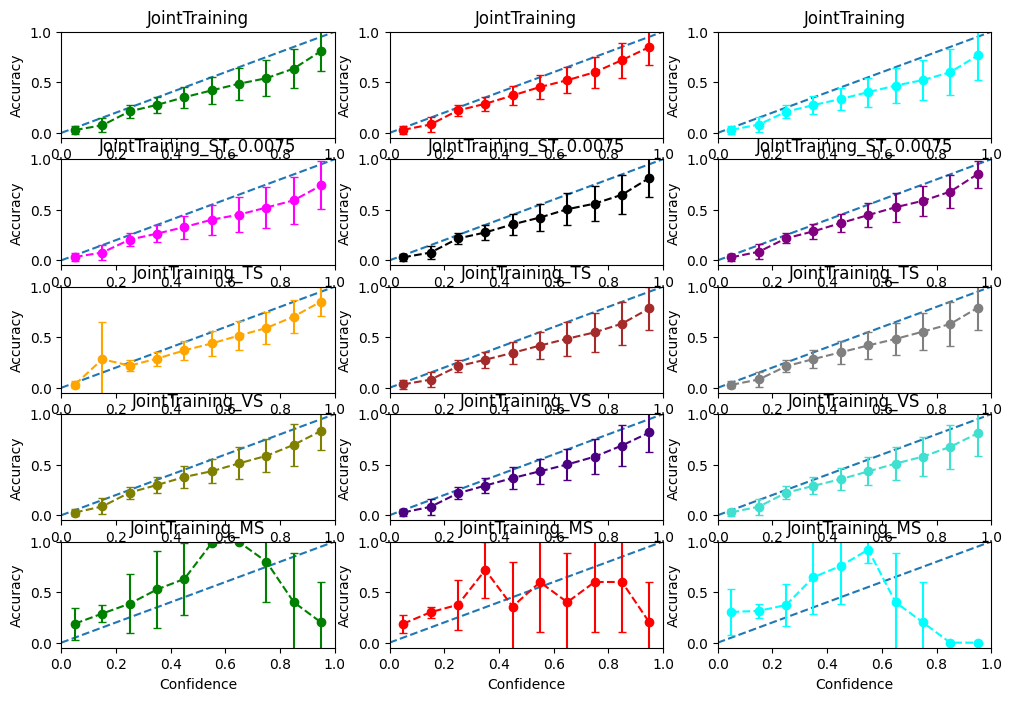

In [81]:
# HISTOGRAM : avg/std across all experiences at the end of training

fig, axs = plt.subplots(5, 3, figsize=(12, 8))
axs = axs.flatten()
for i, (name, vals) in enumerate(ece_hist_vals):
    m = [e[0] for e in vals]
    s = [e[1] for e in vals]
    l = [max(e[0] - e[1], 0) for e in vals] # cap lower-bound at zero
    u = [e[0] + e[1] for e in vals]
    axs[i].plot([0, 1], [0, 1], '--', label='ideal')
    # axs[i].plot(bins, m, color=valid_colors[i])
    # axs[i].fill_between(bins, l, u, alpha=0.3, linestyle='--', color=valid_colors[i])
    axs[i].errorbar(bins, m, yerr=s, marker="o", linestyle="--", capsize=3, capthick=1, color=valid_colors[i])
    axs[i].set_ylim(-0.05, 1)
    axs[i].set_xlim(0, 1)
    axs[i].set_ylabel("Accuracy")
    axs[i].set_xlabel("Confidence")
    # axs[i].legend(loc='upper left', fontsize='small')
    axs[i].set_title(run2label[name])
plt.tight_layout()
plt.savefig(f'./imgs/{DATASET}_{NUM_EXPERIENCES}_avg_std_calibration.png', dpi=400)
plt.show()

In [ ]:
plt.figure(figsize=(10, 9))
plt.plot([0, 1], [0, 1], '--', label='ideal')
for i, (name, vals) in enumerate(ece_hist_vals):
    m = [e[0] for e in vals]
    s = [e[1] for e in vals]
    plt.errorbar(bins, m, yerr=s, marker="o", linestyle="--", capsize=3, capthick=1, color=valid_colors[i], label=run2label[name])
plt.legend(loc='best', fontsize='small')
plt.show()